#### Done by WiDS Mentor Videsh Jagai

## About the Dataset

- According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.

- This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like **gender, age, various diseases, and smoking status**. Each row in the data provides relavant information about the patient.Each row in the data provides relavant information about the patient.

1. id: unique identifier
2. gender: "Male", "Female" or "Other"
3. age: age of the patient
4. hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
5. heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease.
6. ever_married: "No" or "Yes".
7. work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed".
8. Residence_type: "Rural" or "Urban".
9. avg_glucose_level: average glucose level in blood
10. bmi: body mass index
11. smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
12. stroke: 1 if the patient had a stroke or 0 if not






In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Import datasets



In [ ]:
##Import relevant libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

from sklearn.preprocessing import RobustScaler, LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from imblearn.over_sampling import SMOTE

import warnings

warnings.filterwarnings("ignore")


In [ ]:
Hlth_Stroke_DS =pd.read_csv('./drive/MyDrive/Colab Notebooks/WiDS UpSkill Workshop: Machine Learning Basics/healthcare-dataset-stroke-data.csv')

In [ ]:
# Print the following DataFrame
print(Hlth_Stroke_DS)

         id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0           Private          Urban             228.69  36.6  former

In [ ]:
Hlth_Stroke_DS.shape

(5110, 12)

In [ ]:
Hlth_Stroke_DS.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [ ]:
Hlth_Stroke_DS.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [ ]:
Hlth_Stroke_DS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


## Exploratory Data Analysis

In [ ]:
Hlth_Stroke_DS.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
Hlth_Stroke_DS.shape[0]

5110

Only "bmi" has some missing values. Let's see the percentage of missing values for "bmi"

In [ ]:
#Missing_Values= Hlth_Stroke_DS.isna().sum()
for col in Hlth_Stroke_DS.columns:
  NaN_C = Hlth_Stroke_DS[col].isna().sum()
  if NaN_C>=0:
    Missing_Values_Per = NaN_C/(Hlth_Stroke_DS.shape[0]) *100
    print(f'Percentage Distribution of{col}:',Missing_Values_Per)




Percentage Distribution ofid: 0.0
Percentage Distribution ofgender: 0.0
Percentage Distribution ofage: 0.0
Percentage Distribution ofhypertension: 0.0
Percentage Distribution ofheart_disease: 0.0
Percentage Distribution ofever_married: 0.0
Percentage Distribution ofwork_type: 0.0
Percentage Distribution ofResidence_type: 0.0
Percentage Distribution ofavg_glucose_level: 0.0
Percentage Distribution ofbmi: 3.9334637964774952
Percentage Distribution ofsmoking_status: 0.0
Percentage Distribution ofstroke: 0.0



Ratio of **missing values column feature** column 'BMI' is 3.93%


In [ ]:
Missing_Data_C = {'Missing':[Hlth_Stroke_DS['bmi'].isna().sum()], 'Not Missing':[Hlth_Stroke_DS['bmi'].notnull().sum()]}
Missing_BMI = pd.DataFrame(data=Missing_Data_C)

In [ ]:
Missing_BMI

,Missing,Not Missing
0,201,4909


<Axes: >

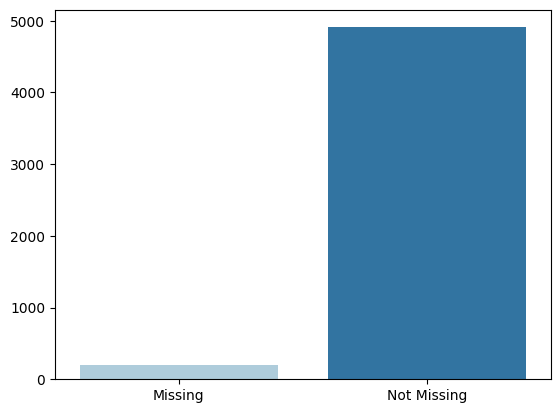

In [ ]:
sns.barplot(data=Missing_BMI, palette="Paired")

### Dealing with Categorical and Numerical Variables

col_names() - This a function created to get the columns names that has categorical and numerical data separately.


In [ ]:
def col_names(df):
  #Get categorical Variables
  cat_cols = [col for col in df.columns if df[col].dtypes not in ["int64", "float64"]]
  # Get numerical Variables
  num_cols=[col for col in df.columns if df[col].dtypes in ["int64",'float64']]
  #Get Numerical but Categorical Variables.
  num_but_cat = [col for col in num_cols if df[col].nunique()<10]
  ## Adding num_but_cat to cat_Col
  cat_cols = num_but_cat + cat_cols
  # num_but_cat removing from num_cols
  num_cols = [col for col in num_cols if col not in num_but_cat]
  print(f"Numerical Cols: {num_cols} \nCategorical Cols: {cat_cols} \nNumerical but Categorical: {num_but_cat}")
  return num_cols, cat_cols



In [ ]:
Numer_Cols , Cateog_Cols= col_names(Hlth_Stroke_DS)

Numerical Cols: ['id', 'age', 'avg_glucose_level', 'bmi'] 
Categorical Cols: ['hypertension', 'heart_disease', 'stroke', 'gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'] 
Numerical but Categorical: ['hypertension', 'heart_disease', 'stroke']


In [ ]:
# Alternatively outputting the correspounding information through the col_name function;
col_names(Hlth_Stroke_DS)

Numerical Cols: ['id', 'age', 'avg_glucose_level', 'bmi'] 
Categorical Cols: ['hypertension', 'heart_disease', 'stroke', 'gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'] 
Numerical but Categorical: ['hypertension', 'heart_disease', 'stroke']


(['id', 'age', 'avg_glucose_level', 'bmi'],
 ['hypertension',
  'heart_disease',
  'stroke',
  'gender',
  'ever_married',
  'work_type',
  'Residence_type',
  'smoking_status'])

In [ ]:
Numer_Cols

['id', 'age', 'avg_glucose_level', 'bmi']

In [ ]:
Cateog_Cols

['hypertension',
 'heart_disease',
 'stroke',
 'gender',
 'ever_married',
 'work_type',
 'Residence_type',
 'smoking_status']

### Analysing Numerical Attributes

In [ ]:
Hlth_Stroke_DS[Numer_Cols].describe().T

,count,mean,std,min,25%,50%,75%,max
id,5110.0,36517.829354,21161.721625,67.00,17741.250,36932.000,54682.00,72940.00
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,4909.0,28.893237,7.854067,10.30,23.500,28.100,33.10,97.60


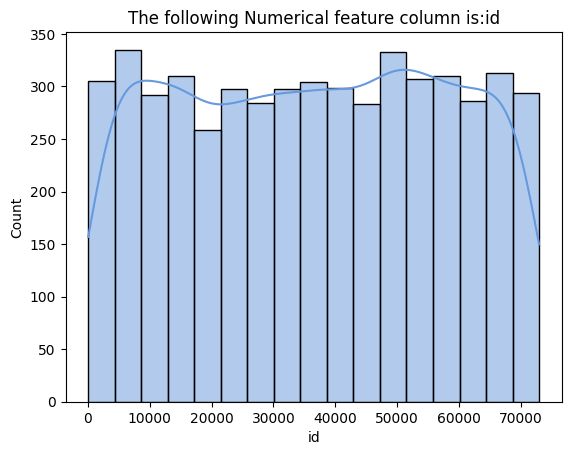

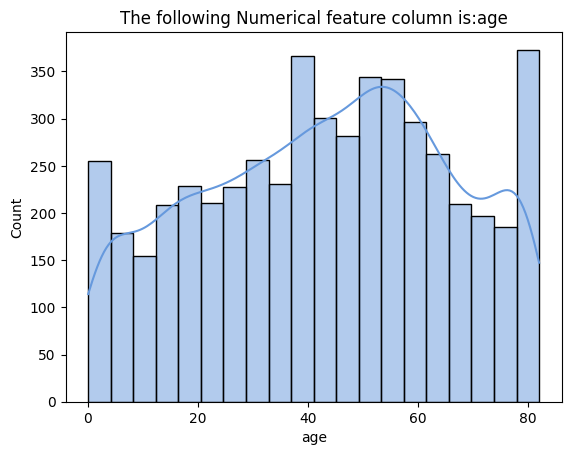

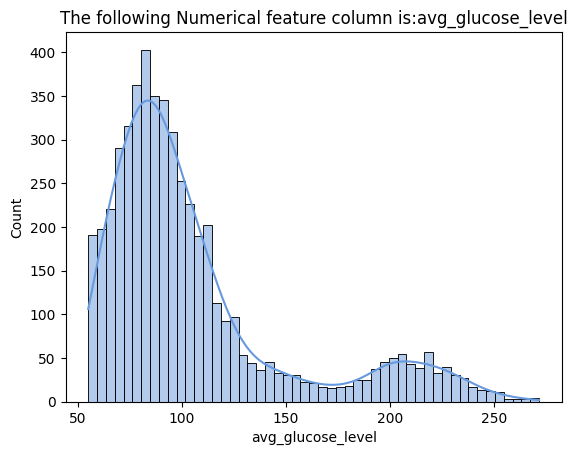

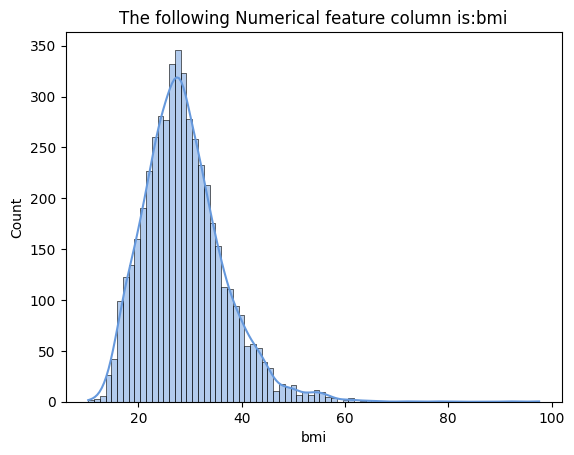

In [ ]:
# Plot Data for each attribute
for col in Numer_Cols:
  sns.histplot(x=Hlth_Stroke_DS[col] ,data=Hlth_Stroke_DS, color='#69d',kde=True)
  plt.title(f'The following Numerical feature column is:{col}')
  plt.show(block=True)
  plt.show()


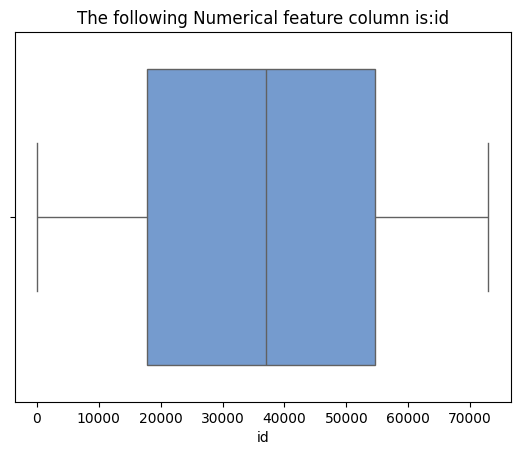

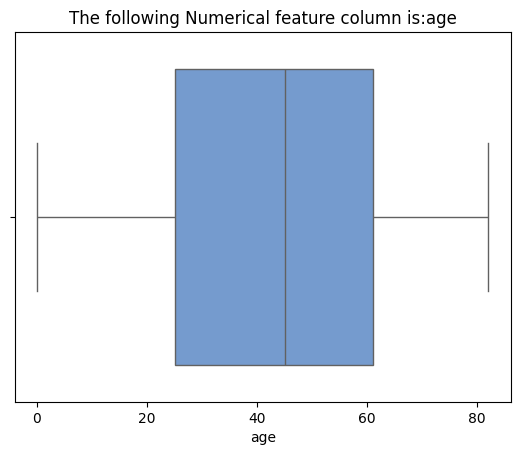

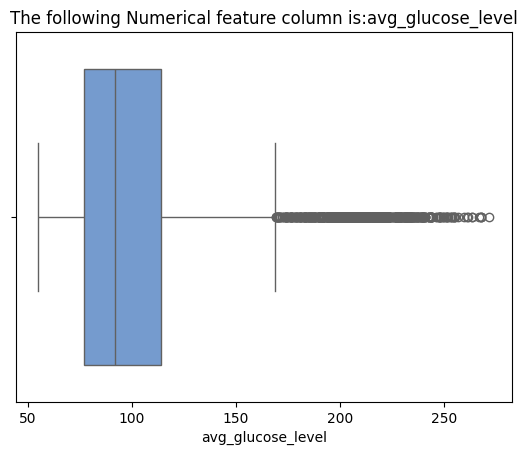

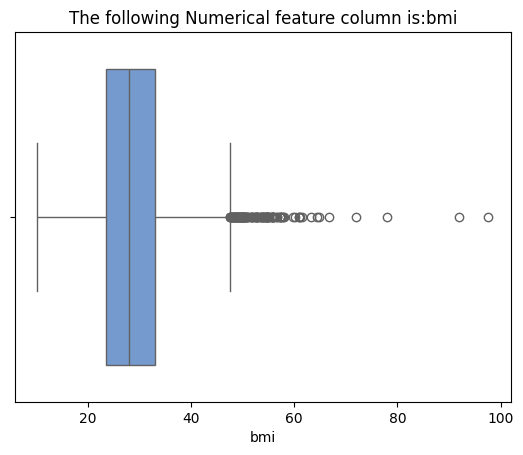

In [ ]:
## checking for outliers respectively..
for col in Numer_Cols:
  sns.boxplot(x=Hlth_Stroke_DS[col] ,data=Hlth_Stroke_DS, color='#69d')
  plt.title(f'The following Numerical feature column is:{col}')
  plt.show(block=True)
  plt.show()


### Checking for Outliers in Numerical Attributes

IQR (Interquatile range) is being used to check for outliers.

check_outliers() - This function will return the columns with outliers.

In [ ]:
def check_outliers(df, numerical_cols, low_threshold=0.1 , up_threshold=0.9):
  outlier_col=[]
  for col in numerical_cols:
    q1 =df[col].quantile(low_threshold)
    q3 =df[col].quantile(up_threshold)
    interquantile = q3-q1
    up_limit = q3 + 1.5*interquantile
    low_limit = q1 -1.5*interquantile
    if df[(df[col]>up_limit) | (df[col]<low_limit)].any(axis=None):
      outlier_col.append(col)
  if not outlier_col:
    print("There is no outliers")
  return outlier_col



In [ ]:
outlier_col = check_outliers(Hlth_Stroke_DS , Numer_Cols )
outlier_col

['bmi']


Above is the generated outliers within the feature column of our Data-Set respectively established incorporating the **check_outlier(df, numerical_Cols, low_threshold, upper_threshold)**function.

### Analysing Categorical Attributes

In [ ]:
Hlth_Stroke_DS[Cateog_Cols].nunique()

hypertension      2
heart_disease     2
stroke            2
gender            3
ever_married      2
work_type         5
Residence_type    2
smoking_status    4
dtype: int64

In [ ]:
Hlth_Stroke_DS[Cateog_Cols].value_counts(normalize=True)

hypertension  heart_disease  stroke  gender  ever_married  work_type      Residence_type  smoking_status 
0             0              0       Female  Yes           Private        Urban           never smoked       0.044618
                                                                          Rural           never smoked       0.041879
                                     Male    No            children       Urban           Unknown            0.033464
                                                                          Rural           Unknown            0.030137
                                     Female  No            children       Rural           Unknown            0.029746
                                                                                                               ...   
              1              0       Female  No            Self-employed  Rural           formerly smoked    0.000196
                                                                    

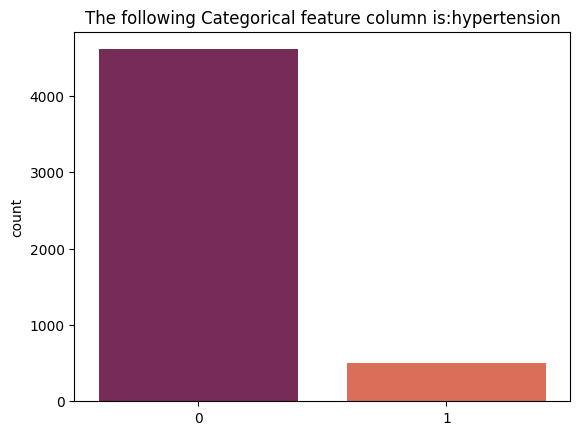

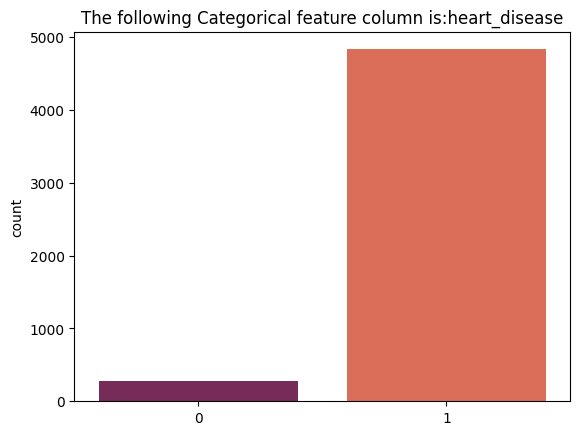

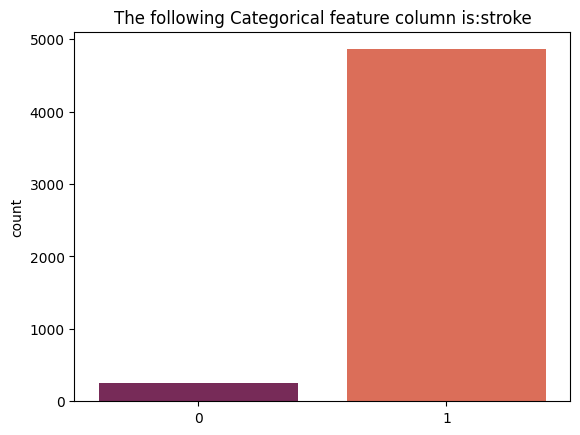

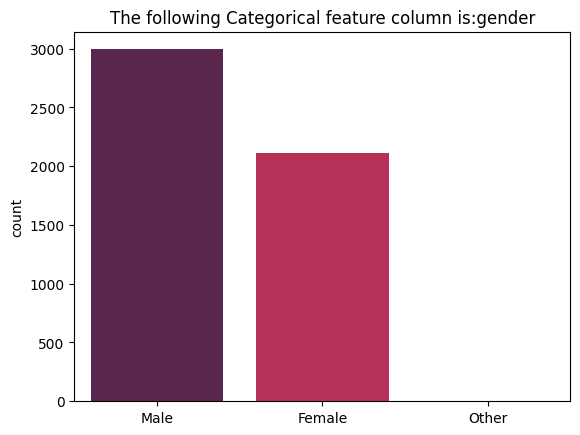

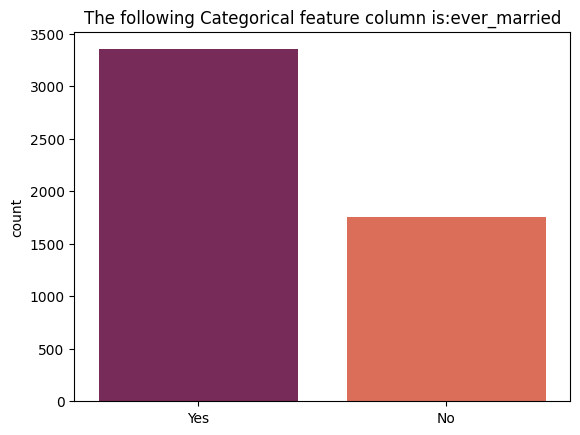

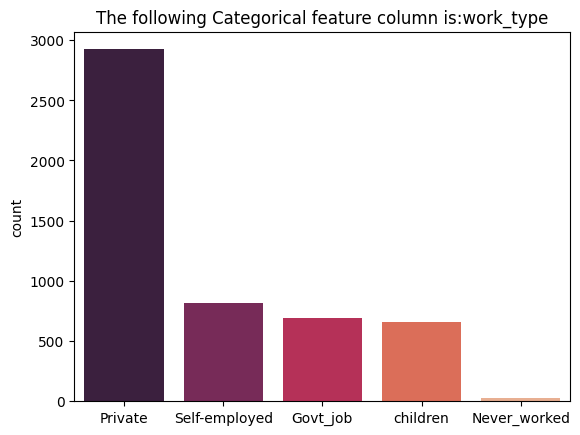

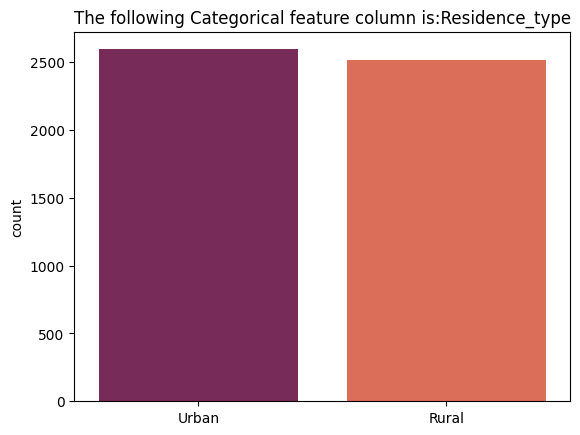

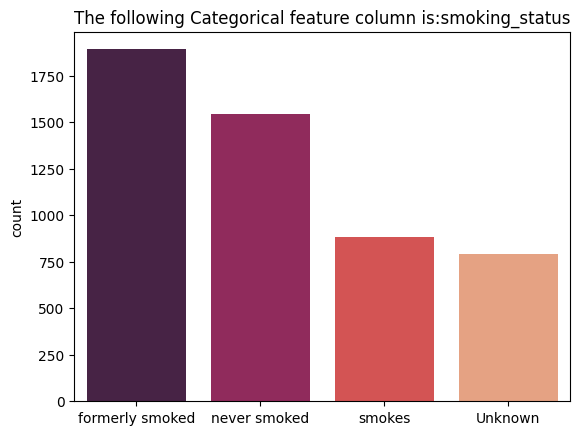

In [ ]:
for col in Cateog_Cols:
  sns.barplot(x=Hlth_Stroke_DS[col].unique(), y=Hlth_Stroke_DS[col].value_counts(), palette="rocket")
  plt.title(f'The following Categorical feature column is:{col}')
  plt.show(block=True)
  plt.show()

### Analysing Target Variable

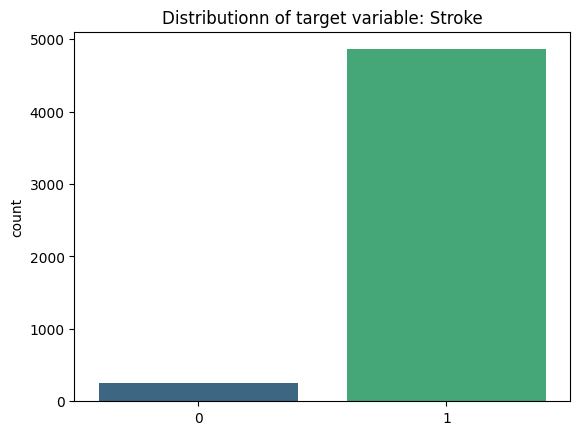

In [ ]:
# Get stroke counts and plot
sns.barplot(x=Hlth_Stroke_DS['stroke'].unique(), y=Hlth_Stroke_DS['stroke'].value_counts(),  palette="viridis")
plt.title('Distributionn of target variable: Stroke')
plt.show(block=True)
plt.show()

([<matplotlib.patches.Wedge at 0x7e9f561e5c60>,
 [Text(-1.0871361453364168, 0.16773491438301516, '1'),
  Text(1.087136143373357, -0.1677349271061446, '0')],
 [Text(-0.5929833520016818, 0.09149177148164463, '95.1%'),
  Text(0.592983350930922, -0.0914917784215334, '4.9%')])

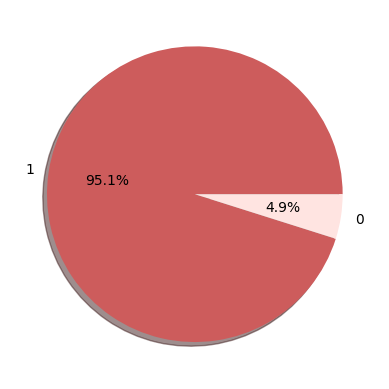

In [ ]:
## plot as a percentage..
plt.pie(Hlth_Stroke_DS['stroke'].value_counts(),labels=[1,0],shadow=True, colors=["indianred", "mistyrose"], autopct="%1.1f%%" )


In [ ]:
## The following is representative column feature column/ target variable e.g. Sroke and its correlation with other feature columns
## {id, age, avg_glucose_level,bmi} via establsihed technique function (;aggregation) exploring different evaluations accordingly. This scenario
## "count" analysis;
for col in Numer_Cols:
    print(Hlth_Stroke_DS.groupby("stroke").agg({col:"count"}), end="\n\n")

          id
stroke      
0       4861
1        249

         age
stroke      
0       4861
1        249

        avg_glucose_level
stroke                   
0                    4861
1                     249

         bmi
stroke      
0       4700
1        209



In [ ]:
for col in Numer_Cols:
  print(Hlth_Stroke_DS.groupby("stroke").agg({col:"mean"}), end="\n\n")

                  id
stroke              
0       36487.236371
1       37115.068273

              age
stroke           
0       41.971545
1       67.728193

        avg_glucose_level
stroke                   
0              104.795513
1              132.544739

              bmi
stroke           
0       28.823064
1       30.471292



In [ ]:
for col in Numer_Cols:
  print(Hlth_Stroke_DS.groupby("stroke").agg({col:"median"}), end="\n\n")

             id
stroke         
0       36958.0
1       36706.0

         age
stroke      
0       43.0
1       71.0

        avg_glucose_level
stroke                   
0                   91.47
1                  105.22

         bmi
stroke      
0       28.0
1       29.7



According to the above resutls, we can see that the possibility of having a stroke increase with the increase of age, gluecose level and the bmi

#### Target Variable vs Categorical Attributes

In [ ]:
for col in Cateog_Cols:
  print(pd.DataFrame({"Target_Mean":Hlth_Stroke_DS.groupby(col)["stroke"].mean()} ))

              Target_Mean
hypertension             
0                0.039679
1                0.132530
               Target_Mean
heart_disease             
0                 0.041787
1                 0.170290
        Target_Mean
stroke             
0               0.0
1               1.0
        Target_Mean
gender             
Female     0.047094
Male       0.051064
Other      0.000000
              Target_Mean
ever_married             
No               0.016505
Yes              0.065613
               Target_Mean
work_type                 
Govt_job          0.050228
Never_worked      0.000000
Private           0.050940
Self-employed     0.079365
children          0.002911
                Target_Mean
Residence_type             
Rural              0.045346
Urban              0.052003
                 Target_Mean
smoking_status              
Unknown             0.030440
formerly smoked     0.079096
never smoked        0.047569
smokes              0.053232


According to the above results,

- People with hypertension are **more likely to have a stroke**

- People with heart disease are **more likely to have a stroke**

- The probability of having a **stroke is higher in men**

- People who have been married are more **likely to have a stroke**

- People who are self-employed are **more likely to have a stroke**

- The probability of having a stroke is **higher in urban life**

- The probability of having a stroke is **higher in formerly smoked people**


### Feature Engineering (Data Preparation)

 #### Checking for duplicates

In [ ]:
Hlth_Stroke_DS.duplicated().sum()

0

There are no duplicates present within the data.

#### Filling Missing Values

- The missing values within the dataset are usually replaced by with **median**. This is expressed as missing values categorised within numerical feature column alongside the distribution of the variable is approximately normal.

- It must be underscored as when distribution is skewed, the median is **less sesitive to outlers than the mean**.




In [ ]:
Hlth_Stroke_DS.fillna(Hlth_Stroke_DS['bmi'].median(), inplace=True)

#### Applying Label Encoder
Label encoder was applied to binary columns (nunique values <2)

In [ ]:
Binary_Col = [col for col in Hlth_Stroke_DS.columns if Hlth_Stroke_DS[col].dtype not in ['int64','float64'] and
              Hlth_Stroke_DS[col].nunique()== 2 ]

In [ ]:
Binary_Col

['ever_married', 'Residence_type']

In [ ]:
LablE = LabelEncoder()

Fit label encoder and return encoded labels

In [ ]:
for col in Binary_Col:
  Hlth_Stroke_DS[col]= LablE.fit_transform(Hlth_Stroke_DS[col])

- Note: **TypeError** : list indices must be integers or slices, indicates that you are accessing a list element using a string index, which is not allowed.

- In your code, trying to access Binary_col list, using the Binary_Col list using the col variable, which is a string.

- You need to use the index of the col element in the Binary_Col list to access the correct

In [ ]:
Hlth_Stroke_DS.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,1,Private,1,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,1,Self-employed,0,202.21,28.1,never smoked,1
2,31112,Male,80.0,0,1,1,Private,0,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,1,Private,1,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,1,Self-employed,0,174.12,24.0,never smoked,1


In [ ]:
for i in range(len(Binary_Col)):
  Binary_Col[i]= LablE.fit_transform(Hlth_Stroke_DS[Binary_Col[i]])

In [ ]:
Binary_Col[i]

array([1, 0, 0, ..., 0, 0, 1])

#### Applying One-Hot Encoder

One-hot encoder will be applied to the attributes more than 2 categories

In [ ]:
On_HoEnC = [col for col in Hlth_Stroke_DS.columns if 2 < Hlth_Stroke_DS[col].nunique() <10]
On_HoEnC

['gender', 'work_type', 'smoking_status']



**Function**:

Convert categorical variable into dummy/indicator variables.

- Each variable is converted in as many 0/1 variables as there are different
values. Columns in the output are each named after a value; if the input is
a DataFrame, the name of the original variable is prepended to the value.


**Returns**

DataFrame:

    -> Dummy-coded data. If data contains other columns than the
    dummy-coded one(s), these will be prepended, unaltered, to the result.


In [ ]:
Hlth_Stroke_DS = pd.get_dummies(Hlth_Stroke_DS, columns=On_HoEnC, drop_first=True)

In [ ]:
Hlth_Stroke_DS.head()

,id,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,0,1,1,1,228.69,36.6,1,True,False,False,True,False,False,True,False,False
1,51676,61.0,0,0,1,0,202.21,28.1,1,False,False,False,False,True,False,False,True,False
2,31112,80.0,0,1,1,0,105.92,32.5,1,True,False,False,True,False,False,False,True,False
3,60182,49.0,0,0,1,1,171.23,34.4,1,False,False,False,True,False,False,False,False,True
4,1665,79.0,1,0,1,0,174.12,24.0,1,False,False,False,False,True,False,False,True,False


#### Dealing with Outliers

Using the IQR method, outliers were replaced with their upper and lower limits


In [ ]:
def replace_with_threshold(df, col, low_threshold=0.1, up_threshold=0.9):
  q1 = df[col].quantile(low_threshold)
  q3 = df[col].quantile(up_threshold)
  interquantile = q3 - q1
  up_limit =  q3 + 1.5*interquantile
  low_limit = q1 - 1.5*interquantile
  df.loc[(df[col]>up_limit), col] = up_limit
  df.loc[(df[col]<low_limit),col]=low_limit

In [ ]:
for col in outlier_col:
  replace_with_threshold(Hlth_Stroke_DS, col)

In [ ]:
check_outliers(Hlth_Stroke_DS, Numer_Cols)

There is no outliers


[]

#### Feature Scalling

Min-Max Scaler was applied to **"age", "bmi" and "avg_glucose_level"**

In [ ]:
MinMax_Sc = MinMaxScaler()
Hlth_Stroke_DS["age"] = MinMax_Sc.fit_transform(Hlth_Stroke_DS[["age"]])
Hlth_Stroke_DS["bmi"] = MinMax_Sc.fit_transform(Hlth_Stroke_DS[["bmi"]])
Hlth_Stroke_DS["avg_glucose_level"] = MinMax_Sc.fit_transform(Hlth_Stroke_DS[["avg_glucose_level"]])

In [ ]:
Hlth_Stroke_DS.head()

,id,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,0.816895,0,1,1,1,0.801265,0.464541,1,True,False,False,True,False,False,True,False,False
1,51676,0.743652,0,0,1,0,0.679023,0.314404,1,False,False,False,False,True,False,False,True,False
2,31112,0.975586,0,1,1,0,0.234512,0.392122,1,True,False,False,True,False,False,False,True,False
3,60182,0.597168,0,0,1,1,0.536008,0.425682,1,False,False,False,True,False,False,False,False,True
4,1665,0.963379,1,0,1,0,0.549349,0.241985,1,False,False,False,False,True,False,False,True,False


## Model Building

In [ ]:
y = Hlth_Stroke_DS["stroke"]
x = Hlth_Stroke_DS.drop(["stroke","id"], axis=1)

- Below classification models are used for predicting the stroke:

- **Logistic Regression:**: Uses sigmoid function (Logistic Function) to map predictions and their probabilities.

- **K-Neighbours Classifiers:** Assumes similarity between the new data and availabile case and put the new case into the category that is most similar to the available category.

-  **Decision Tree Classifiers:** Predicts the value of the target variable by learning simple decision rules inferred from the data features.

- **Random Forest Classifier:** Multiple decision trees are created using different random subsets of data and features.

-  **Support Vector Machine:** Try to find the best hyperplane to separate two classes. Uses statistical approach.

- **Gradient Boosting Classifier**: Combines the predictions of multiple weak learners to create a single, more accurate strong learner.

- **XGB Classifier:** utilizes decision trees as base learners and employs regularization techniques to enhance model generalization.

- **LGM Classifier:** A gradient boosting framework that uses tree based learning algorithm. LightGBM grows tree vertically while other tree based learning algorithms grow trees horizontally.



In [ ]:
models = [("LR",LogisticRegression()),
           ("KNN", KNeighborsClassifier()),
           ("DecisionTree", DecisionTreeClassifier()),
           ("RF", RandomForestClassifier()),
           ("SVC",SVC()),
           ("GBM", GradientBoostingClassifier()),
           ("XGBoost", XGBClassifier())]

1. **Check the number of elements in the *models* list**:

In [ ]:
print(len(models))

7


-**Verify that each element in the models list is a tuple with two elements**:

In [ ]:
for element in models:
  print(f'Element : {element}, Type:{type(element)}')


Element : ('LR', LogisticRegression()), Type:<class 'tuple'>
Element : ('KNN', KNeighborsClassifier()), Type:<class 'tuple'>
Element : ('DecisionTree', DecisionTreeClassifier()), Type:<class 'tuple'>
Element : ('RF', RandomForestClassifier()), Type:<class 'tuple'>
Element : ('SVC', SVC()), Type:<class 'tuple'>
Element : ('GBM', GradientBoostingClassifier()), Type:<class 'tuple'>
Element : ('XGBoost', XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing

In [ ]:
for name, classifier in models:
  cv= cross_validate(classifier, x, y, cv=5, scoring=["accuracy","f1","recall","precision"])
  print(f'{name} \n {"Accuracy"}:{cv["test_accuracy"].mean()} \n {"Recall"}:{cv["test_recall"].mean()} \n {"Precision"}:{cv["test_precision"].mean()} \n {"F-Score"}:{cv["test_f1"].mean()}')

LR 
 Accuracy:0.9514677103718199 
 Recall:0.004081632653061224 
 Precision:0.2 
 F-Score:0.007999999999999998
KNN 
 Accuracy:0.9506849315068493 
 Recall:0.028163265306122447 
 Precision:0.5666666666666667 
 F-Score:0.05262994086523498
DecisionTree 
 Accuracy:0.9136986301369863 
 Recall:0.2003265306122449 
 Precision:0.16907346790325514 
 F-Score:0.18195772626311002
RF 
 Accuracy:0.9499021526418787 
 Recall:0.004 
 Precision:0.1 
 F-Score:0.007692307692307693
SVC 
 Accuracy:0.9512720156555773 
 Recall:0.0 
 Precision:0.0 
 F-Score:0.0
GBM 
 Accuracy:0.9483365949119372 
 Recall:0.004081632653061224 
 Precision:0.05 
 F-Score:0.007547169811320753
XGBoost 
 Accuracy:0.9418786692759296 
 Recall:0.06408163265306124 
 Precision:0.20427323103154302 
 F-Score:0.09664131161047815


#### Sampling


 SMOTE (Synthetic Minority Oversampling Technique) Sampling

- SMOTE operates by **selecting examples that are close in the feature space**, drawing a line between the **examples in the feature space and drawing new sample at a point along that line**.

- Specifically, a random example from the minority class; first chosen respectively. Then k of the nearest neighbors for that example are found (typically k=5).

- Particualarly , a random example from minority class is selected accordingly. Then k of the nearest neighbors for that example are found/located respectively (typically k=5).


-  In summary; A randomly selected neighbor is chosen and a synthetic example is created at a randomly selected point between the two examples in feature space.


In [ ]:
SM = SMOTE()
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)


In [ ]:
sum(y_train ==1)

196

In [ ]:
sum(y_train == 0)

3892

In [ ]:
X_train_smote, y_train_smote = SM.fit_resample(X_train, y_train)

In [ ]:
sum(y_train_smote == 1)

3892

In [ ]:
sum(y_train_smote == 0)

3892

In [ ]:
for name, classifier in models:
  classifier.fit(X_train_smote, y_train_smote)
  Clasf = classifier.predict(X_test)
  print(f'{name}\n Confusion Matrix \n{confusion_matrix(y_test, Clasf)}\n {classification_report(y_test,Clasf)} \n')



In [ ]:
for name, classifer in models:
  classifer.fit(X_train_smote, y_train_smote)
  Clasf = classifer.predict(X_test)
  print(f'{name}\nConfusion Matrix: \n{confusion_matrix(y_test, Clasf)}\n{classification_report(y_test, Clasf)}\n')

LR
Confusion Matrix: 
[[728 241]
 [ 14  39]]
              precision    recall  f1-score   support

           0       0.98      0.75      0.85       969
           1       0.14      0.74      0.23        53

    accuracy                           0.75      1022
   macro avg       0.56      0.74      0.54      1022
weighted avg       0.94      0.75      0.82      1022


KNN
Confusion Matrix: 
[[778 191]
 [ 34  19]]
              precision    recall  f1-score   support

           0       0.96      0.80      0.87       969
           1       0.09      0.36      0.14        53

    accuracy                           0.78      1022
   macro avg       0.52      0.58      0.51      1022
weighted avg       0.91      0.78      0.84      1022


DecisionTree
Confusion Matrix: 
[[862 107]
 [ 35  18]]
              precision    recall  f1-score   support

           0       0.96      0.89      0.92       969
           1       0.14      0.34      0.20        53

    accuracy                      

In [ ]:
for name, classifier in models:
    cv = cross_validate(classifier, X_train_smote, y_train_smote, cv=5, scoring=["accuracy", "f1", "recall", "precision"])
    print(f'{name} \n {"Accuracy"}:{cv["test_accuracy"].mean()} \n {"Recall"}:{cv["test_recall"].mean()} \n {"Precision"}:{cv["test_precision"].mean()} \n {"F-Score"}:{cv["test_f1"].mean()}')

LR 
 Accuracy:0.7857140734356658 
 Recall:0.8309304988598527 
 Precision:0.7621942183480087 
 F-Score:0.7950074098235508
KNN 
 Accuracy:0.881680543791782 
 Recall:0.9714794855971831 
 Precision:0.823627272704119 
 F-Score:0.8914464800205947
DecisionTree 
 Accuracy:0.8828378514478935 
 Recall:0.9036412116252134 
 Precision:0.8676154249408036 
 F-Score:0.8849323426630535
RF 
 Accuracy:0.9303701832506979 
 Recall:0.9676217944698727 
 Precision:0.9006652212249879 
 F-Score:0.9328693821090213
SVC 
 Accuracy:0.8401849677961539 
 Recall:0.9188036867515205 
 Precision:0.7940215264543298 
 F-Score:0.8518344344142607
GBM 
 Accuracy:0.859326732411714 
 Recall:0.9144278968158372 
 Precision:0.8237450318755336 
 F-Score:0.8664779307312497
XGBoost 
 Accuracy:0.9280584572863575 
 Recall:0.946289983533038 
 Precision:0.913032387091669 
 F-Score:0.9290883684650911
